<a href="https://colab.research.google.com/github/EumGitae/Machine-Learning/blob/main/13week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

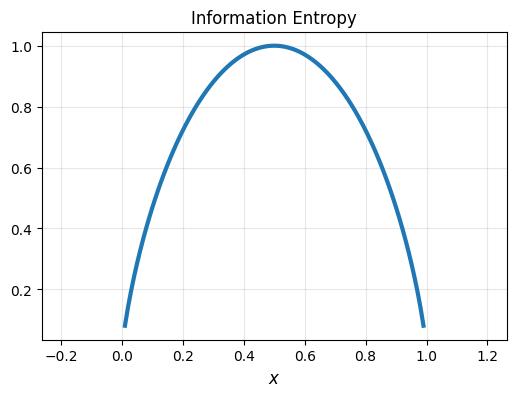

In [2]:
#information entropy

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0.01, 0.99, 100)
y = -x*np.log2(x) - (1-x)*np.log2(1-x) # 정보엔트로피

plt.figure(figsize = (6, 4))
plt.plot(x, y, linewidth = 3)
plt.xlabel(r'$x$', fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.title('Information Entropy')
plt.show()

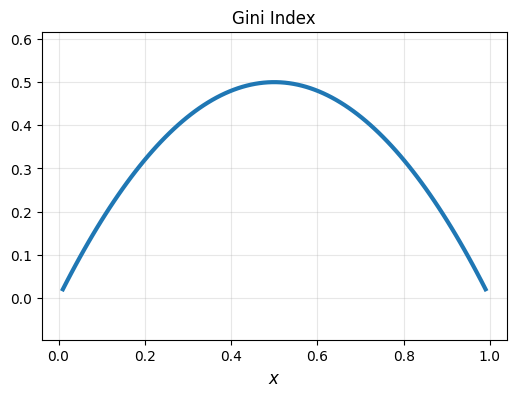

In [6]:
# Gini Index

x = np.linspace(0.01, 0.99, 100)
y = 2*x*(1-x)
plt.figure(figsize = (6, 4))
plt.plot(x, y, linewidth = 3)
plt.xlabel(r'$x$', fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.title('Gini Index')
plt.show()

In [17]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

data = np.array([[0, 1, 1, 0, 1],
                [0, 1, 2, 0, 1],
                [1, 0, 0, 2, 0],
                [0, 1, 0, 2, 1],
                [0, 0, 0, 1, 1],
                [0, 0, 1, 1, 1],
                [0, 0, 0, 0, 1],
                [0, 1, 1, 2, 0],
                [1, 0, 2, 2, 0],
                [0, 1, 2, 1, 0],
                [0, 1, 0, 0, 1],
                [1, 0, 1, 1, 0],
                [0, 0, 0, 2, 1],
                [1, 0, 2, 0, 0],
                [0, 1, 1, 1, 0]])
X = data[:,0:4]
y = data[:,4]
print(np.unique(X[:,0]))
print(X[:,0])

[0 1]
[0 0 1 0 0 0 0 0 1 0 0 1 0 1 0]
(array([0, 1]), array([7, 8]))


In [42]:
def entropy(y):
    # y의 고유값과 각각의 빈도수 계산
    values, counts = np.unique(y, return_counts=True) # np.unique로 클래스 종류와 개수를 구하고 p로 변환 -> (array([0, 1]), array([7, 8]))
    p = counts / counts.sum()  # pk
    # 엔트로피 계산
    return -np.sum(p * np.log2(p))

# 전체 데이터의 엔트로피 계산
total_entropy = entropy(y)
print(f"전체 데이터 엔트로피: {total_entropy:.4f}")

#  피처별(출석, 과제, 중간고사, 기말고사) 정보 이득(Information Gain) 계산
for feature_idx in range(X.shape[1]): # X.shpae[1] = 4 -> X의 열 개수
    feature_values = np.unique(X[:, feature_idx])  # 0 아니면 1
    feature_entropy = 0
    for value in feature_values:
        # 해당 값에 해당하는 데이터 인덱스
        idx = X[:, feature_idx] == value # value가 0일때 열값이 0이면 true 아니면 false
        subset_y = y[idx] # idx가 true인 위치만 가져옴 -> 1열이 참일때 그때의 y값
        weight = len(subset_y) / len(y)
        subset_entropy = entropy(subset_y) # 0일때 weight이랑 엔트로피곱한거 + 1일때 weight이랑 엔트로피곱한거
        feature_entropy += weight * subset_entropy
    #print(f"Feature {feature_idx}의 엔트로피: {feature_entropy:.4f}")
    info_gain = total_entropy - feature_entropy
    print(f"Feature {feature_idx}의 정보 이득: {info_gain:.4f}")

전체 데이터 엔트로피: 0.9968
Feature 0의 정보 이득: 0.3769
Feature 1의 정보 이득: 0.0037
Feature 2의 정보 이득: 0.1968
Feature 3의 정보 이득: 0.1088


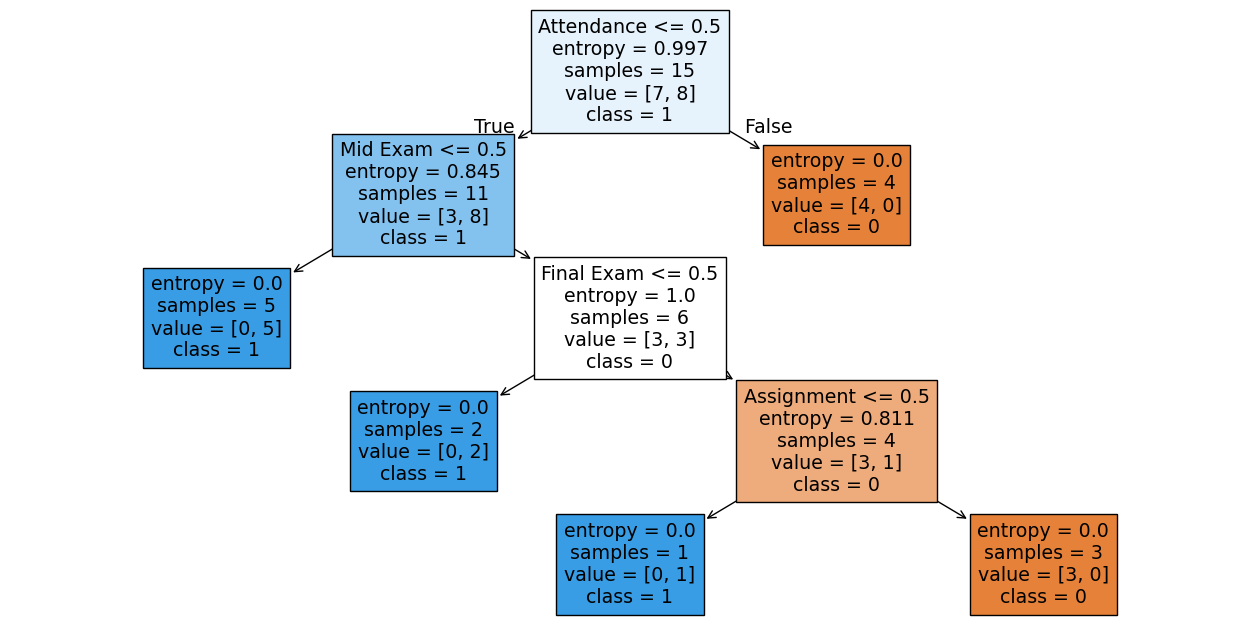

In [54]:
# scikit-learn의 DecisionTreeClassifier를 엔트로피 기준으로 학습
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)
clf.fit(X, y)

# Decision Tree for binary classifier
plt.figure(figsize=(16,8))
tree.plot_tree(clf, feature_names=['Attendance', 'Assignment', 'Mid Exam', 'Final Exam'], class_names=['0', '1'], filled=True)
plt.show()

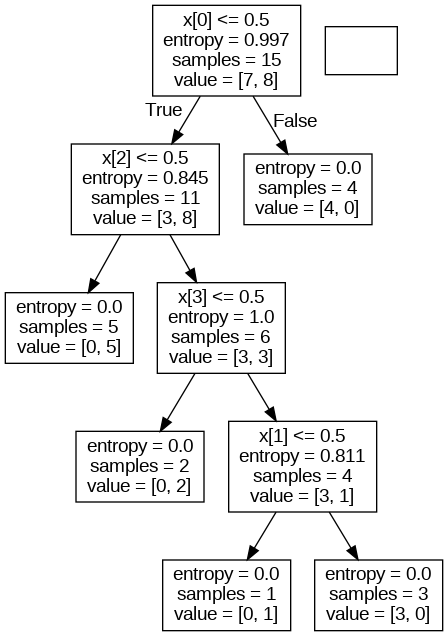

In [43]:
# Decision Tree for binary classifier
dot_data = export_graphviz(clf)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [44]:
test = np.array([[0, 1, 1, 2, 0],
                [0, 1, 0, 2, 1],
                [0, 0, 1, 0, 1],
                [0, 1, 0, 2, 1],
                [0, 0, 0, 0, 1],
                [0, 0, 2, 0, 1],
                [0, 0, 0, 0, 1],
                [0, 0, 1, 2, 1],
                [0, 1, 0, 1, 0],
                [0, 0, 1, 1, 1],
                [0, 1, 1, 1, 0],
                [0, 0, 1, 1, 1],
                [1, 0, 2, 0, 0],
                [1, 0, 1, 0, 0],
                [0, 1, 2, 1, 0]])
testX = test[:,0:4]
testy = test[:,4]

Accuracy (Pre-Pruned Tree): 0.6


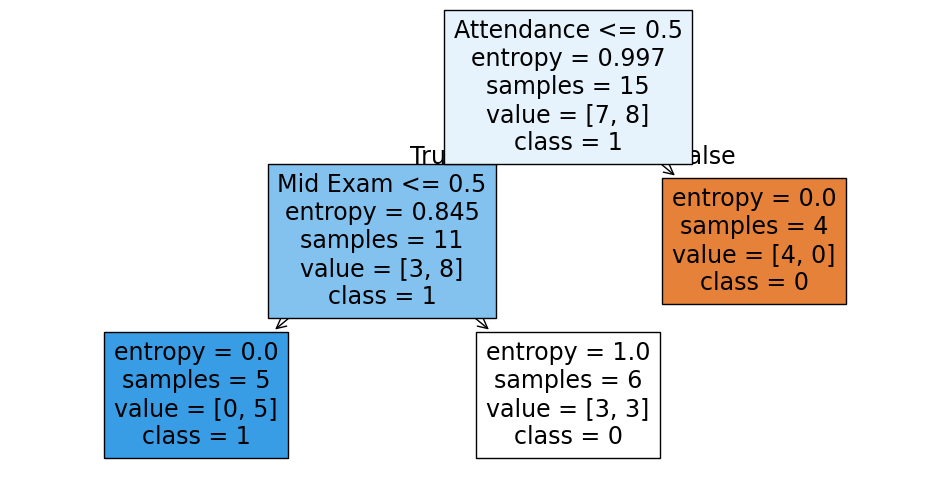

In [58]:
from sklearn.metrics import accuracy_score

# Train a decision tree with pre-pruning -> 사전 가지치
tree_pre_pruned = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=10, max_depth=4, random_state=0) # min_samples 얘로 조정할 수 있음
tree_pre_pruned.fit(X, y)

# Evaluate on test data
y_pred_pre = tree_pre_pruned.predict(testX) # 학습된 모델로 테스트 데이터로 예측값 생성
print("Accuracy (Pre-Pruned Tree):", accuracy_score(testy, y_pred_pre)) # 비교해서 정확도계산

# Decision Tree for binary classifier
plt.figure(figsize=(12,6))
tree.plot_tree(tree_pre_pruned, feature_names=['Attendance', 'Assignment', 'Mid Exam', 'Final Exam'], class_names=['0', '1'], filled=True)
plt.show()

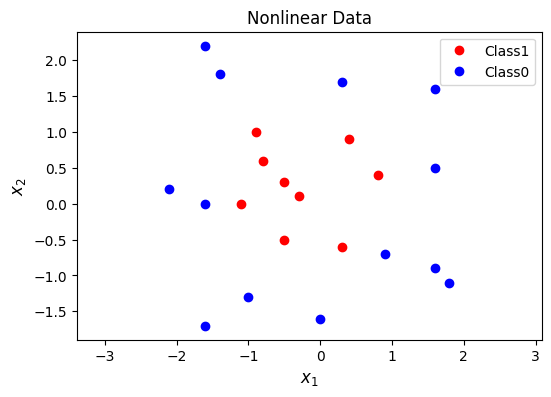

In [86]:
# Nonlinear Classification
X1 = np.array([[-1.1,0],[-0.3,0.1],[-0.9,1],[0.8,0.4],[0.4,0.9],[0.3,-0.6],
               [-0.5,0.3],[-0.8,0.6],[-0.5,-0.5]])

X0 = np.array([[-1,-1.3], [-1.6,2.2],[0.9,-0.7],[1.6,0.5],[1.8,-1.1],[1.6,1.6],
               [-1.6,-1.7],[-1.4,1.8],[1.6,-0.9],[0,-1.6],[0.3,1.7],[-1.6,0],[-2.1,0.2]])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

plt.figure(figsize = (6, 4))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'Class1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'Class0')
plt.title('Nonlinear Data', fontsize = 12)
plt.xlabel(r'$x_1$', fontsize = 12)
plt.ylabel(r'$x_2$', fontsize = 12)
plt.legend(loc = 1)
plt.axis('equal')
plt.show()

In [87]:
N = X1.shape[0]
M = X0.shape[0]

X = np.asarray(np.vstack([X1,X0]))
y = np.asarray(np.vstack([np.ones([N,1]), np.zeros([M,1])]))

In [91]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [92]:
clf.predict([[0,0]])

array([1.])

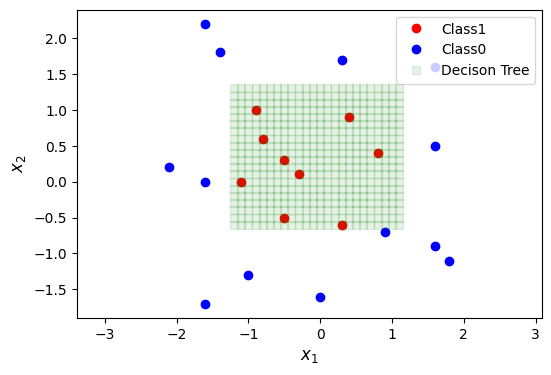

In [93]:
# Nonlinear Decision Tree
[X1gr, X2gr] = np.meshgrid(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])

q = clf.predict(Xp)
q = np.asmatrix(q).reshape(-1,1)

C1 = np.where(q == 1)[0]

plt.figure(figsize = (6, 4))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'Class1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'Class0')
plt.plot(Xp[C1,0], Xp[C1,1], 'gs', markersize = 6, alpha = 0.1, label = 'Decison Tree')
plt.xlabel(r'$x_1$', fontsize = 12)
plt.ylabel(r'$x_2$', fontsize = 12)
plt.legend(loc = 1)
plt.axis('equal')
plt.show()

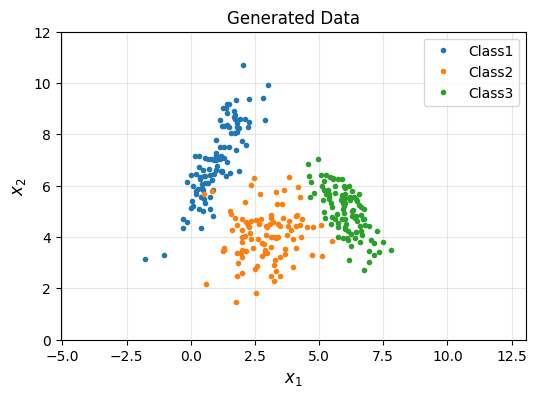

In [115]:
# Multiclass Classification
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## generate three simulated clusters
mu1 = np.array([1, 7])
mu2 = np.array([3, 4])
mu3 = np.array([6, 5])

SIGMA1 = 0.8*np.array([[1, 1.5],
                       [1.5, 3]])
SIGMA2 = 0.5*np.array([[2, 0],
                       [0, 2]])
SIGMA3 = 0.5*np.array([[1, -1],
                       [-1, 2]])

X1 = np.random.multivariate_normal(mu1, SIGMA1, 100)
X2 = np.random.multivariate_normal(mu2, SIGMA2, 100)
X3 = np.random.multivariate_normal(mu3, SIGMA3, 100)

y1 = 1*np.ones([100,1])
y2 = 2*np.ones([100,1])
y3 = 3*np.ones([100,1])

plt.figure(figsize = (6, 4))
plt.title('Generated Data', fontsize = 12)
plt.plot(X1[:,0], X1[:,1], '.', label = 'Class1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'Class2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'Class3')
plt.xlabel('$x_1$', fontsize = 12)
plt.ylabel('$x_2$', fontsize = 12)
plt.legend(loc = 1)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

In [116]:
X = np.vstack([X1, X2, X3])
y = np.vstack([y1, y2, y3])

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

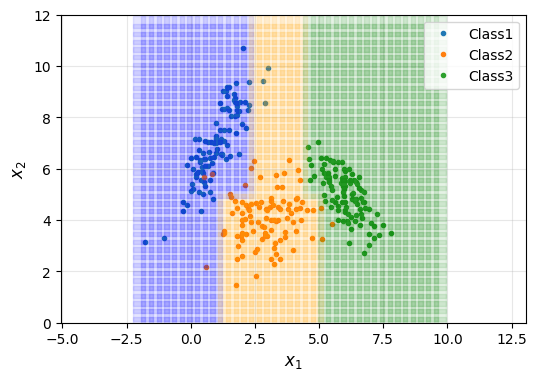

In [117]:
res = 0.3
[X1gr, X2gr] = np.meshgrid(np.arange(-2, 10, res), np.arange(0, 12, res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])

q = clf.predict(Xp)
q = np.asmatrix(q).reshape(-1,1)

C1 = np.where(q == 1)[0]
C2 = np.where(q == 2)[0]
C3 = np.where(q == 3)[0]

plt.figure(figsize = (6, 4))
plt.plot(X1[:,0], X1[:,1], '.', label = 'Class1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'Class2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'Class3')
plt.plot(Xp[C1,0], Xp[C1,1], 's', color = 'blue', markersize = 8, alpha = 0.1)
plt.plot(Xp[C2,0], Xp[C2,1], 's', color = 'orange', markersize = 8, alpha = 0.1)
plt.plot(Xp[C3,0], Xp[C3,1], 's', color = 'green', markersize = 8, alpha = 0.1)
plt.xlabel('$x_1$', fontsize = 12)
plt.ylabel('$x_2$', fontsize = 12)
plt.legend(loc = 1)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

In [118]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 0)
clf.fit(X, np.ravel(y))

RandomForestClassifier(max_depth=3, random_state=0)

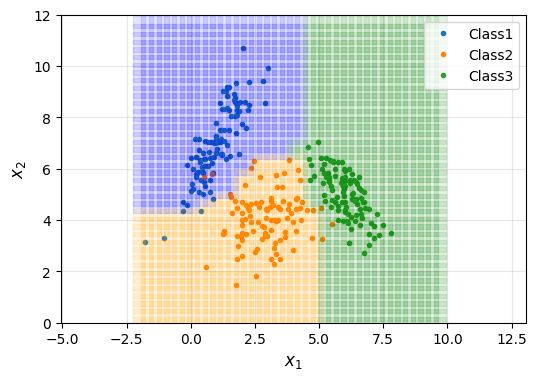

In [119]:
res = 0.3
[X1gr, X2gr] = np.meshgrid(np.arange(-2, 10, res), np.arange(0, 12, res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])

q = clf.predict(Xp)
q = np.asmatrix(q).reshape(-1,1)

C1 = np.where(q == 1)[0]
C2 = np.where(q == 2)[0]
C3 = np.where(q == 3)[0]

plt.figure(figsize = (6, 4))
plt.plot(X1[:,0], X1[:,1], '.', label = 'Class1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'Class2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'Class3')
plt.plot(Xp[C1,0], Xp[C1,1], 's', color = 'blue', markersize = 8, alpha = 0.1)
plt.plot(Xp[C2,0], Xp[C2,1], 's', color = 'orange', markersize = 8, alpha = 0.1)
plt.plot(Xp[C3,0], Xp[C3,1], 's', color = 'green', markersize = 8, alpha = 0.1)
plt.xlabel('$x_1$', fontsize = 12)
plt.ylabel('$x_2$', fontsize = 12)
plt.legend(loc = 1)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

In [177]:
data = np.array([[0, 2, 1, 0, 0],
                [0, 2, 1, 1, 0],
                [1, 2, 1, 0, 1],
                [2, 1, 1, 0, 1],
                [2, 0, 0, 0, 1],
                [2, 0, 0, 1, 0],
                [1, 0, 0, 1, 1],
                [0, 1, 1, 0, 0],
                [0, 0, 0, 0, 1],
                [2, 1, 0, 0, 1],
                [0, 1, 0, 1, 1],
                [1, 1, 1, 1, 1],
                [1, 2, 0, 0, 1],
                [2, 1, 1, 1, 0]])
X = data[:,0:4]
y = data[:,4]

In [178]:
# Information entropy 함수 정의
def entropy(y):
    # y의 고유값과 각각의 빈도수 계산
    values, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()  # pk
    # 엔트로피 계산
    return -np.sum(p * np.log2(p))

# 전체 데이터의 엔트로피 계산
total_entropy = entropy(y)
print(f"전체 데이터 엔트로피: {total_entropy:.3f}")

#  피처별(출석, 과제, 중간고사, 기말고사) 정보 이득(Information Gain) 계산
for feature_idx in range(X.shape[1]):
    feature_values = np.unique(X[:, feature_idx])
    feature_entropy = 0
    for value in feature_values:
        # 해당 값에 해당하는 데이터 인덱스
        idx = X[:, feature_idx] == value
        subset_y = y[idx]
        weight = len(subset_y) / len(y)
        subset_entropy = entropy(subset_y)
        feature_entropy += weight * subset_entropy
    info_gain = total_entropy - feature_entropy
    print(f"Feature {feature_idx}의 정보 이득: {info_gain:.3f}")

전체 데이터 엔트로피: 0.940
Feature 0의 정보 이득: 0.247
Feature 1의 정보 이득: 0.029
Feature 2의 정보 이득: 0.152
Feature 3의 정보 이득: 0.048


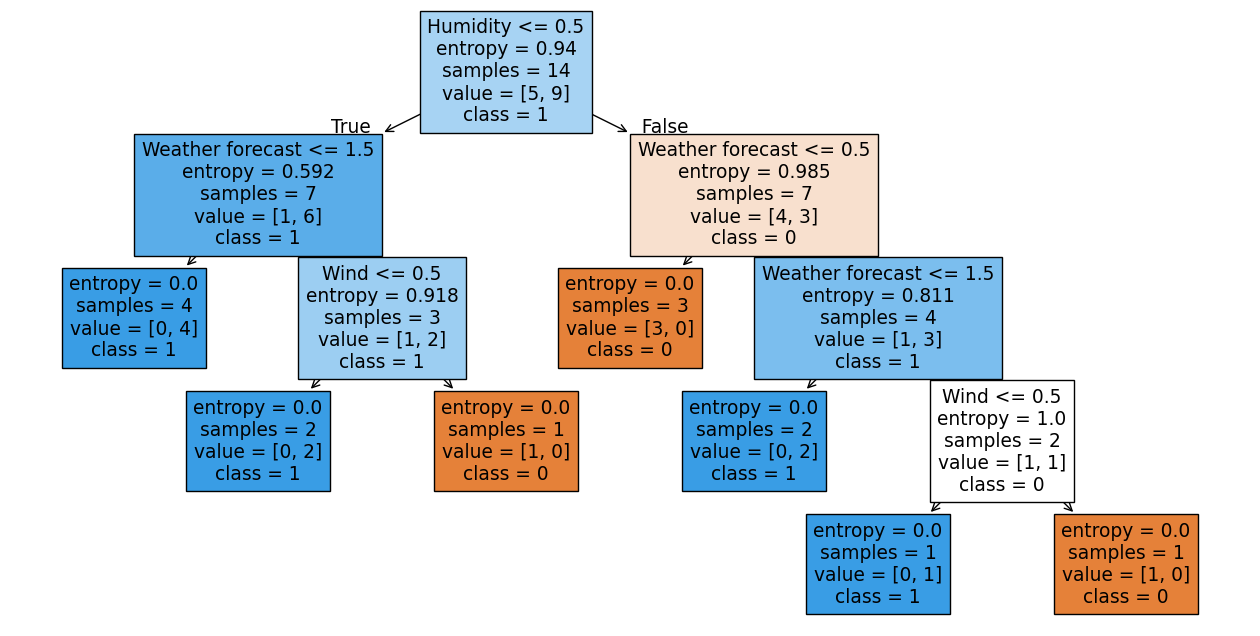

In [179]:
# scikit-learn의 DecisionTreeClassifier를 엔트로피 기준으로 학습
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5)
clf.fit(X, y)

# Decision Tree for binary classifier
plt.figure(figsize=(16,8))
tree.plot_tree(clf, feature_names=['Weather forecast', 'Temperature', 'Humidity', 'Wind'], class_names=['0', '1'], filled=True)
plt.show()

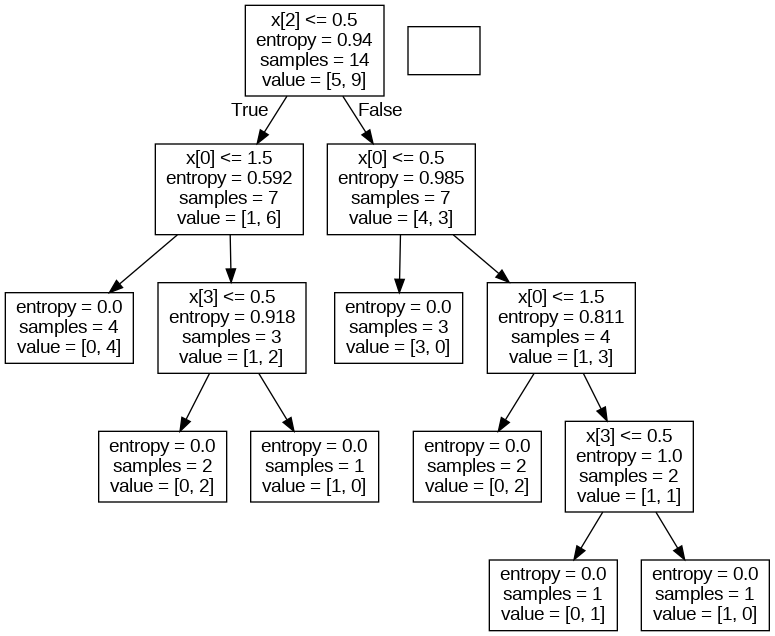

In [180]:
# Decision Tree for binary classifier
dot_data = export_graphviz(clf)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [181]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [182]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug200.csv")

In [183]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [184]:
df['Sex'] = df['Sex'].replace({'F':2,'M':1})
df['BP'] = df['BP'].replace({'HIGH':2,'LOW':1,'NORMAL':0})
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH':2,'LOW':1,'NORMAL':0})
df['Drug'] = df['Drug'].replace({'drugA':1,'drugB':2,'drugC':3,'drugX':4,'drugY':5})
df.head()

<ipython-input-184-e2e5d35e11f0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'F':2,'M':1})
<ipython-input-184-e2e5d35e11f0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BP'] = df['BP'].replace({'HIGH':2,'LOW':1,'NORMAL':0})
<ipython-input-184-e2e5d35e11f0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_op

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,2,2,25.355,5
1,47,1,1,2,13.093,3
2,47,1,1,2,10.114,3
3,28,2,0,2,7.798,4
4,61,2,1,2,18.043,5


In [185]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

정확도 (Accuracy): 1.0


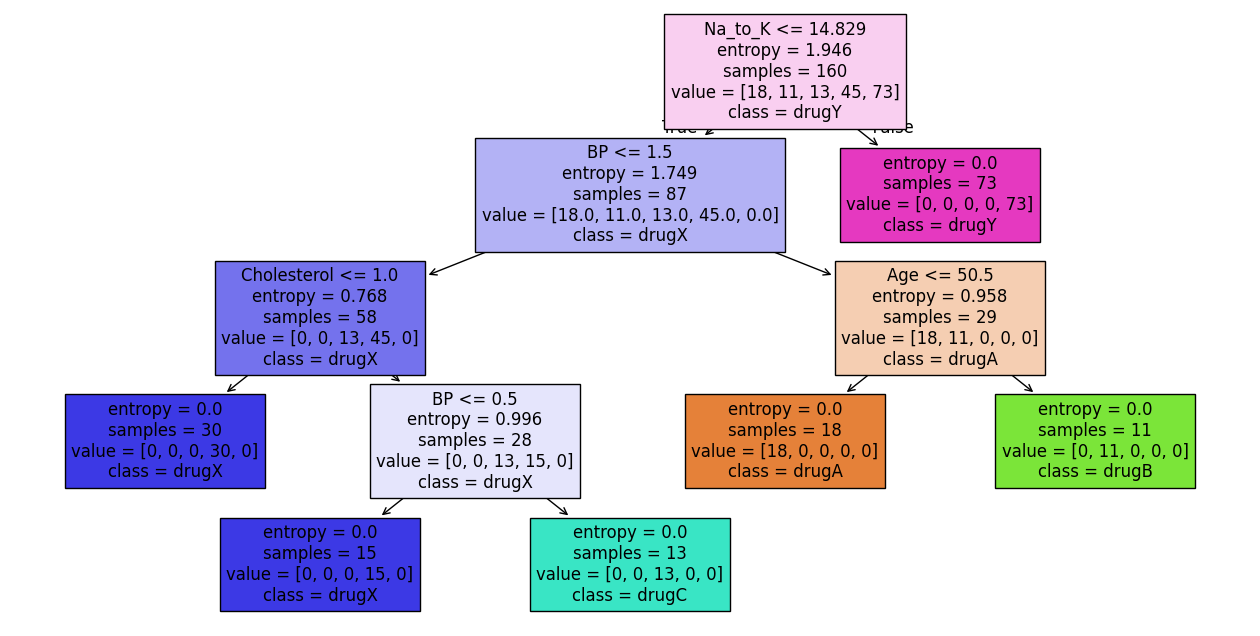

In [187]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("정확도 (Accuracy):", accuracy_score(y_test, y_pred))
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)

plt.figure(figsize=(16, 8))
tree.plot_tree(clf, feature_names=['Age','Sex', 'BP', 'Cholesterol', 'Na_to_K'], class_names=['drugA', 'drugB', 'drugC' , 'drugX', 'drugY'], filled=True)
plt.show()